# Análisis sobre viajes en taxi en Chicago

Esta análisis tiene como objetivo encontrar patrones en la información disponible y comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes de taxi de la ciudad de Chicago.

Se tiene información sobre viajes en taxi en Chicago, las compañias que hay, los vecindarios y el clima de dicha ciudad. Se cuenta con datos de distintos días de noviembre de 2017.

## Inicialización y vista general 

In [42]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import seaborn as sn

In [3]:
# Cargar archivos de datos en un DataFrame
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_trips = pd.read_csv('/datasets/project_sql_result_04.csv')
df_trips_la = pd.read_csv('/datasets/project_sql_result_07.csv')

In [4]:
#Vista previa de df_company
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


El dataset contiene datos sobre la cantidad de viajes hechos por cada compañia el 15 y 16 de noviembre de 2017 en Chicago y cuenta con las siguientes columnas:
- `company_name` (nombre de la empresa de taxis)
- `trips_amount` (número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017)

In [5]:
#información general sobre df_company
df_company.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 64 entries, 0 to 63

Data columns (total 2 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   company_name  64 non-null     object

 1   trips_amount  64 non-null     int64 

dtypes: int64(1), object(1)

memory usage: 1.1+ KB


In [6]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
#Vista previa de df_trips
df_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


El dataset contiene datos de la terminación de viajes de Chicago en noviembre de 2017 y cuenta con las siguientes columnas:
- `dropoff_location_name` (barrios donde finalizaron los viajes)
- `average_trips` (el promedio de viajes que terminaron en cada barrio)

In [8]:
#información general sobre df_trips
df_trips.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 94 entries, 0 to 93

Data columns (total 2 columns):

 #   Column                 Non-Null Count  Dtype  

---  ------                 --------------  -----  

 0   dropoff_location_name  94 non-null     object 

 1   average_trips          94 non-null     float64

dtypes: float64(1), object(1)

memory usage: 1.6+ KB


In [9]:
df_trips.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [10]:
#Vista previa de df_trips_la
df_trips_la.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


El dataset contiene datos sobre viajes hechos los sábados de noviembre, desde el Loop hasta el Aeropuerto Internacional O'Hare y tiene las siguientes columnas:
- `start_ts` (fecha y hora de la recogida)
- `weather_conditions` (condiciones climáticas en el momento en el que comenzó el viaje)
- `duration_seconds` (duración del viaje en segundos)

In [11]:
#información general sobre df_trips_la
df_trips_la.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1068 entries, 0 to 1067

Data columns (total 3 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   start_ts            1068 non-null   object 

 1   weather_conditions  1068 non-null   object 

 2   duration_seconds    1068 non-null   float64

dtypes: float64(1), object(2)

memory usage: 25.2+ KB


In [12]:
df_trips_la.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


La información anterior muestra que los tres DataFrames tienen los tipos de datos correctos, a excepcion de una columna del último df, y no hay prescencia de valores ausentes.

## Preprocesamiento de datos
Se analizan a fondo los datos y se hacen las correcciones necesarias.

### Buscar y corregir datos duplicados
Se analiza la columna `company_name` del DataFrame df_company, la columna `dropoff_location_name` del DataFrame df_trips y la columna `weather_conditions` en busca de valores extraños o duplicados.

In [13]:
#Se buscan valores duplicados en la columna company_name
df_company['company_name'].sort_values().unique()

array(['0118 - 42111 Godfrey S. Awir', '1085 - 72312 N and W Cab Co',
       '1469 - 64126 Omar Jada', '2092 - 61288 Sbeih Company',
       '2192 - 73487 Zeymane Corp', '2241 - 44667 - Felman Corp',
       '24 Seven Taxi', '2733 - 74600 Benny Jona',
       '2809 - 95474 C & D Cab Co Inc.', '2823 - 73307 Lee Express Inc',
       '3011 - 66308 JBL Cab Inc.', '303 Taxi',
       '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab',
       '3620 - 52292 David K. Cab Corp.',
       '3623 - 72222 Arrington Enterprises', '3721 - Santamaria Express',
       '4053 - 40193 Adwar H. Nikola', '4615 - 83503 Tyrone Henderson',
       '4623 - 27290 Jay Kim', '5 Star Taxi', '5006 - 39261 Salifu Bawa',
       '5062 - 34841 Sam Mestas', '5074 - 54002 Ahzmi Inc',
       '5874 - 73628 Sergey Cab Corp.', '5997 - 65283 AW Services Inc.',
       '6057 - 24657 Richard Addo', '6574 - Babylon Express Inc.',
       '6742 - 83735 Tasha Ride Inc', '6743 - 78771 Luhak Corp',
       'American United', 'American Un

In [14]:
#corregir compañias duplicadas
df_company['company_name'] = df_company['company_name'].replace('American United', 'American United Taxi Affiliation')
df_company['company_name'] = df_company['company_name'].replace('Checker Taxi','Checker Taxi Affiliation')
df_company['company_name'] = df_company['company_name'].replace('Medallion Leasing','Chicago Medallion Leasing INC')

In [15]:
#unir viajes de compañias duplicadas
for company in ['American United Taxi Affiliation','Checker Taxi Affiliation','Chicago Medallion Leasing INC']:
    print(df_company[df_company['company_name']== company])
    print()

                        company_name  trips_amount

21  American United Taxi Affiliation          1404

31  American United Taxi Affiliation           210



                company_name  trips_amount

15  Checker Taxi Affiliation          2216

20  Checker Taxi Affiliation          1486



                     company_name  trips_amount

2   Chicago Medallion Leasing INC         10367

19  Chicago Medallion Leasing INC          1607




In [16]:
#sumar viajes de compañias iguañes
df_company.loc[21,'trips_amount'] = 1404+210
df_company.loc[15,'trips_amount'] = 2216+1486
df_company.loc[2,'trips_amount'] = 10367+1607

#Eliminar compañias duplicadas
df_company=df_company.drop([31, 20, 19],axis=0).reset_index(drop=True)

In [17]:
#verificar resultado
df_company.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 61 entries, 0 to 60

Data columns (total 2 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   company_name  61 non-null     object

 1   trips_amount  61 non-null     int64 

dtypes: int64(1), object(1)

memory usage: 1.1+ KB


In [18]:
#Se buscan valores duplicados en la columna dropoff_location_name
df_trips['dropoff_location_name'].sort_values().unique()

array(['Albany Park', 'Andersonville', 'Archer Heights', 'Armour Square',
       'Ashburn', 'Auburn Gresham', 'Austin', 'Avalon Park', 'Avondale',
       'Belmont Cragin', 'Beverly', 'Boystown', 'Bridgeport',
       'Brighton Park', 'Bucktown', 'Burnside', 'Calumet Heights',
       'Chatham', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Douglas',
       'Dunning', 'East Side', 'East Village', 'Edgewater', 'Edison Park',
       'Englewood', 'Fuller Park', 'Gage Park', 'Garfield Park',
       'Garfield Ridge', 'Gold Coast', 'Grand Boulevard',
       'Grand Crossing', 'Grant Park', 'Hegewisch', 'Hermosa',
       'Humboldt Park', 'Hyde Park', 'Irving Park', 'Jackson Park',
       'Jefferson Park', 'Kenwood', 'Lake View', 'Lincoln Park',
       'Lincoln Square', 'Little Italy, UIC', 'Little Village',
       'Logan Square', 'Loop', 'Lower West Side', 'Mckinley Park',
       'Montclare', 'Morgan Park', 'Mount Greenwood', 'Museum Campus',
       'Near South Side', 'New City', 'North Center', 'Nor

In [19]:
#Se buscan valores duplicados en la columna weather_conditions
df_trips_la['weather_conditions'].sort_values().unique()

array(['Bad', 'Good'], dtype=object)

No se encuentran valores duplicados ni extraños en las columnas `dropoff_location_name` y `weather_conditions`.

### Corregir tipo de dato
La unica columna con un tipo de dato errroneo es `start_ts` del DataFrame df_trips_la pues no es de tipo fecha.

In [20]:
#cambiar tipo de dato
df_trips_la['start_ts'] = pd.to_datetime(df_trips_la['start_ts'],format='%Y-%m-%d %H:%M')
#verificar cambio
df_trips_la.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1068 entries, 0 to 1067

Data columns (total 3 columns):

 #   Column              Non-Null Count  Dtype         

---  ------              --------------  -----         

 0   start_ts            1068 non-null   datetime64[ns]

 1   weather_conditions  1068 non-null   object        

 2   duration_seconds    1068 non-null   float64       

dtypes: datetime64[ns](1), float64(1), object(1)

memory usage: 25.2+ KB


### Enriquecer datos 
Se agrega la columna `day` al DataFrame df_trips_la.

In [21]:
df_trips_la['weekday'] = df_trips_la['start_ts'].dt.weekday 
df_trips_la.head(3)

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5


In [22]:
#se comprueba que únicamente hay datos del día sábado
df_trips_la.groupby(['weekday','weather_conditions']).count()

start_ts  duration_seconds
weekday weather_conditions                            
5       Bad                      180               180
        Good                     888               888

## Analizar barrios en términos de finalización del recorrido
Se examina el número de viajes hechos hacia cada barrio de Chicago.

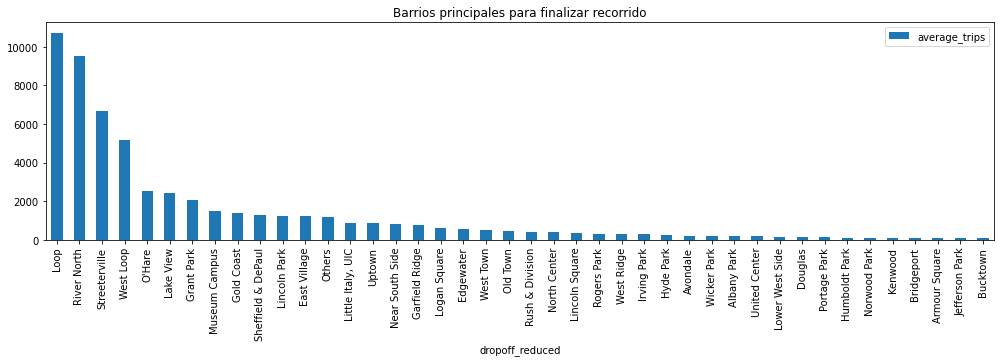

In [23]:
#grafica de cantidades de viajes terminados por barrio
df_trips['dropoff_reduced']= df_trips['dropoff_location_name'].where( df_trips['average_trips']>70,'Others')
df_trips.groupby('dropoff_reduced').sum().sort_values(by='average_trips',ascending=False
                                                                                     ).plot(kind='bar',figsize=(17,4))
plt.title('Barrios principales para finalizar recorrido')
plt.show()

In [24]:
#barrios principales
df_trips.groupby('dropoff_reduced').sum().sort_values(by='average_trips',ascending=False).head(10)

,average_trips
dropoff_reduced,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


In [25]:
print('Los 10 barrios principales en terminación de viajes representan el', 
      round(df_trips[df_trips['average_trips']>1259]['average_trips'].sum()/df_trips['average_trips'].sum()*100,2),
      '% de todos los viajes.')

Los 10 barrios principales en terminación de viajes representan el 76.69 % de todos los viajes.


In [26]:
print('El barrio Loop, en terminación de viajes, representan el',round(10727.466/df_trips['average_trips'].sum()*100,2
                                                                                          ),'% de todos los viajes.')

El barrio Loop, en terminación de viajes, representan el 19.02 % de todos los viajes.


El barrio Loop es donde terminan la mayoría de los viajes, seguido por los barrios River North, Streeterville y West Loop. Los siguientes vecindarios tienen la mitad o menos viajes que los ya mencionados.

## Analizar empresas de taxis
Se analiza la cantidad de viajes por empresa de taxis

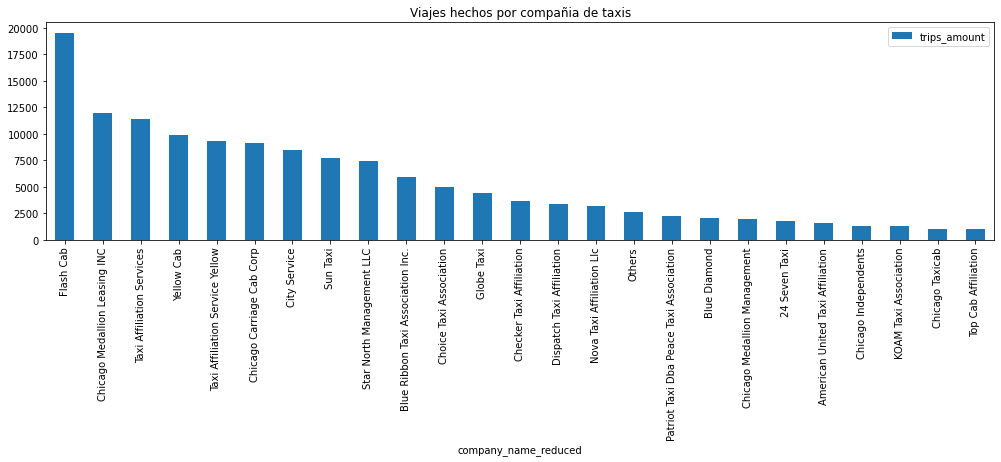

In [27]:
#grafica de cantidades de viajes hechos por cada compañia
df_company['company_name_reduced'] = df_company['company_name'].where(df_company['trips_amount']>500,'Others')
df_company.groupby('company_name_reduced').sum().sort_values(by='trips_amount',ascending=False
                                                                                    ).plot(kind='bar',figsize=(17,4))
plt.title('Viajes hechos por compañia de taxis')
plt.show()

In [28]:
#Compañias de taxis principales
df_company.groupby('company_name_reduced').sum().sort_values(by='trips_amount',ascending=False).head(10)

,trips_amount
company_name_reduced,
Flash Cab,19558
Chicago Medallion Leasing INC,11974
Taxi Affiliation Services,11422
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


In [29]:
print('Las 10 compañias de taxis principales tienen el',
      round(df_company[df_company['trips_amount']>=5953]['trips_amount'].sum()/df_company['trips_amount'].sum()*100,2),
      '% de todos los viajes.')

Las 10 compañias de taxis principales tienen el 73.47 % de todos los viajes.


In [30]:
print('La empresa Flash Cab es la principal compañia de taxis, esta tiene el',
      round(19558/df_company['trips_amount'].sum()*100,2), '% de todos los viajes.')

La empresa Flash Cab es la principal compañia de taxis, esta tiene el 14.24 % de todos los viajes.


## Analizar relación entre clima y duración de viajes
Se analiza la duración de viajes por el tipo de clima

In [31]:
#media de cada condición de clima
df_trips_la.groupby('weather_conditions').mean('duration_seconds')

,duration_seconds,weekday
weather_conditions,,
Bad,2427.205556,5
Good,1999.675676,5


In [32]:
#mediana de cada condición de clima
df_trips_la.groupby('weather_conditions').median('duration_seconds')

,duration_seconds,weekday
weather_conditions,,
Bad,2540.0,5
Good,1800.0,5


Los viajes donde el clima se considera malo (Bad), tienden a durar más que cuando se tiene un clima bueno (Good).

In [33]:
print('En promedio, los viajes de días malos duran',2540-1800, 'segundos más, o',round((2540-1800)/60,2 ),
      'minutos más, que los viajes de días buenos.')

En promedio, los viajes de días malos duran 740 segundos más, o 12.33 minutos más, que los viajes de días buenos.


### Prueba de hipótesis 

A continuación se prueba la siguiente hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Se establece el nivel de significación (alfa) como 5%.

In [34]:
df_trips_la_bad = df_trips_la.query('weather_conditions == "Bad"')['duration_seconds']
df_trips_la_good = df_trips_la.query('weather_conditions == "Good"')['duration_seconds']

#### Comprobación de distribución normal
Se corrobora que la distribucion de ambas muestras sea normal.

Hipótesis nula: Los datos siguen una distribución normal.

Hipótesis alterna: Los datos no siguen una distribución normal.

In [35]:
#comprobación de distribución normal para la muestra
alpha = 0.05 #nivel de significancia estadística crítica

# Normalidad de los residuos Shapiro-Wilk test Xone
shapiro_test = st.shapiro(df_trips_la['duration_seconds'])
print(shapiro_test)

if shapiro_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")

ShapiroResult(statistic=0.9303929209709167, pvalue=7.176113416711356e-22)

Se rechaza la hipótesis nula


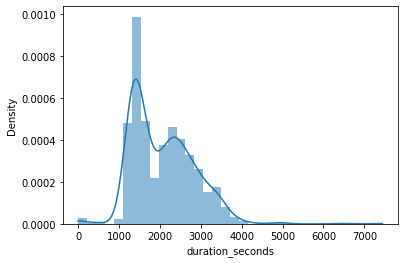

In [46]:
sn.histplot(df_trips_la['duration_seconds'], kde=True, stat="density", linewidth=0)
plt.show()

Los datos no siguen una distribución normal, al graficarlos, se observa una distribución bimodal que comunmente aparece al tener datos de dos sistemas o condiciones dierentes, en este caso podría deberse a la diferencia del clima. Se continua el análisis tomando en cuenta este hecho.

#### Comprobación de varianzas iguales
Se corrobora que las muestras tengan varianzas iguales.

Hipótesis nula: las muestras tienen varianzas iguales.

Hipótesis alterna: las muestras tienen varianzas diferentes.

In [37]:
#Varianza de las muestras - prueba de levene
levene_test = st.levene (df_trips_la_bad, df_trips_la_good, center = 'median') 
print('Prueba de varianzas iguales:')
print(levene_test)

if levene_test[1] < alpha: print("Se rechaza la hipótesis nula")
else: print("No se rechaza la hipótesis nula")
print()

Prueba de varianzas iguales:

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

No se rechaza la hipótesis nula




Se asumen varianzas iguales

#### Aplicar prueba de hipótesis

Se tiene una distribución binomial con varianzas iguales por lo que se continua la prueba de hipótesis aplicando el test de Mann-Whitney.

Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, es igual los sábados con buen clima y los sábados lluviosos.

Hipótesis alterna: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, es diferente los sábados con buen clima y los sábados lluviosos.

In [48]:
ttest,pvalue = st.mannwhitneyu(df_trips_la_bad,df_trips_la_good, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se rechaza la hipótesis nula")

p-value:0.0000

Se rechaza la hipótesis nula


Se establece que la duración de los viajes cambia en base al clima.

## Conclusión

El barrio Loop es donde terminan la mayoría de los viajes, seguido por los barrios River North, Streeterville y West Loop. Los siguientes vecindarios tienen la mitad o menos viajes que los ya mencionados.

En cuanto a las compañias de taxis principales, Flash Cab tiene el 14.24 % de todos los viajes, le siguen Chicago Medallion Leasing INC, Taxi Affiliation Services, Yellow Cab, entre otros.

Al examinar patrones externos como el clima, se determinó que durante los días con clima malo, los viajes tienden a tener más duración, esto podría deberse a que si, por ejemplo esta lloviendo, los clientes no quieren mojarse. 